In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import ceil

In [ ]:
x = np.linspace(-6, 6, 100)

# plt.plot(x, norm.pdf(x), 'b-', lw=1, alpha=0.6, label='norm pdf')
# plt.plot(x, norm.cdf(x), 'r-', lw=5, alpha=0.1, label='norm pdf')
# plt.show()
# экспериментим


lam = np.sqrt(2*np.pi)/4

Производная $\Phi(\lambda x)$ это $\lambda \frac{d}{dx}\Phi(\lambda x) = \lambda \frac{1}{\sqrt{2\pi}}e^{-(\lambda x)^2/2}$. В нуле она равна $\frac{\lambda}{\sqrt{2\pi}}$. Производная сигмоиды это $$\sigma'(x) = - \frac{-e^{-x}}{(1+e^{-x})^2} = \frac{e^{-x}+ 1 -1}{(1+e^{-x})^2} = \sigma(x) - \sigma(x)^2$$
В нуле оно принимает значение $1/2 - 1/4 = 1/4$

Таким образом $\lambda = \sqrt{2\pi}/4$

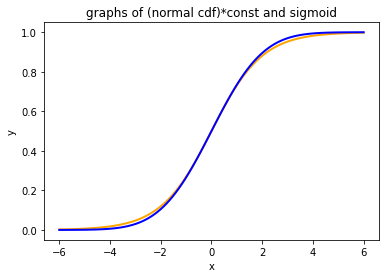

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
plt.plot(x, sigmoid(x), color='orange', lw=2, alpha=1, label='norm pdf')
plt.plot(x, norm.cdf(lam*x), 'b-', lw=2, alpha=1, label='norm pdf')

plt.xlabel("x")
plt.ylabel("y")
plt.title("graphs of (normal cdf)*const and sigmoid")

plt.show()

Оценим $||\Phi(\lambda \cdot ) - \sigma||_\infty$. Для этого сначала ограничим рассмотрение с всего $\mathbb{R}$ на какой-то отрезок $K$ длины $l$. Теперь на нём наспамим много-много точек и в качестве ответа возьмем максимум. 

Насколько много нужно точек? Если всего их $x_1, \ldots, x_N \in [-6, 6]$ и по ним мы получаем значения $|\Phi(\lambda \cdot x_k) - \sigma(x_k)|$, то колебания на отрезках $[x_k, x_{k+1}]$ можно оценить следующим образом:

функция $g(x) = \Phi(\lambda x) - \sigma(x)$ Липшицева, поскольку у нее ограниченная производная. Константу Липшицевости $g$ можем оценить как $||\Phi(\lambda \cdot )'||_\infty + ||\sigma'||_\infty \leqslant \lambda+1 = \frac{\sqrt{2\pi}}{4}+1 \leqslant 1.7$. Это значит, что 
$$\sup_{a, b \in [x_k ,x_{k+1}]}|g(a)-g(b)|\leqslant 1.7 \sup _{a, b \in [x_k ,x_{k+1}]} |a-b| = 1.7|x_{k+1}-x_k|$$
Значит для точности в $10^{-6}$ надо наспамить $\lceil 1.7 \cdot l\cdot 10^6\rceil+1$ равномерных точек. 

Ну вот и возьмем в качестве $K$ отрезок от $3/2$ до $6$ длины $9/2$. 

In [ ]:
x_norm = np.linspace(1.5 , 6, ceil(1.7*(9/2)*(10**6))+1)
def g(x):
  return abs(norm.cdf(lam*x) - sigmoid(x))
max_value = 0

for x_0 in x_norm:
  max_value = max(max_value, g(x_0))
print(max_value)

0.017671188617077838


In [ ]:
Он час считал и сказал 0.017671188617077838